# Building a single-layer neural network

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

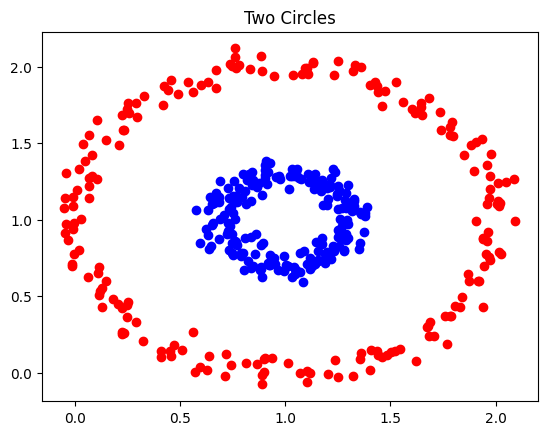

False

In [12]:
SEED = 2017
X, y = make_circles(n_samples=400, factor=.3, noise=.05,random_state=2017)
X += 1
outer = y == 0
inner = y == 1
plt.title("Two Circles")
plt.plot(X[outer, 0], X[outer, 1], "ro")
plt.plot(X[inner, 0], X[inner, 1],"bo") 
plt.show() == 1  

In [13]:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=SEED)
def sigmoid(x):     return 1 / (1 + np.exp(-x))
n_hidden = 50 
n_epochs = 1000 
learning_rate = 1
weights_hidden = np.random.normal(0.0, size=(X_train.shape[1], n_hidden))
weights_output = np.random.normal(0.0, size=(n_hidden))

In [14]:
hist_loss = []
hist_accuracy = []
# print(weights_hidden)
# print(weights_output)

In [15]:
for e in range(n_epochs):
    del_w_hidden = np.zeros(weights_hidden.shape)
    del_w_output = np.zeros(weights_output.shape)


In [16]:
for x_,y_ in zip(X_train,y_train):
    hidden_input = np.dot(x_, weights_hidden)
    hidden_output = sigmoid(hidden_input)
    output = sigmoid(np.dot(hidden_output, weights_output))

In [17]:
error = y_ - output    
output_error = error * output *(1-output)
hidden_error =np.dot(output_error, weights_output) * hidden_output * (1 -hidden_output)
del_w_output += output_error * hidden_output
del_w_hidden += hidden_error * x_[:, None] 

In [18]:
weights_hidden += learning_rate * del_w_hidden / X_train.shape[0]
weights_output += learning_rate * del_w_output / X_train.shape[0]

In [19]:
if e % 100 == 0:
    hidden_output = sigmoid(np.dot(X_val, weights_hidden))
out = sigmoid(np.dot(hidden_output, weights_output))
loss = np.mean((out - y_val) ** 2)


In [20]:
predictions = out > 0.5
accuracy = np.mean(predictions == y_val)
print("Epoch: ", '{:>4}'.format(e),
      "; Validation loss: ", '{:>6}'.format(loss.round(4)),
      "; Validation accuracy: ", '{:>6}'.format(accuracy.round(4)))

Epoch:   999 ; Validation loss:  0.4085 ; Validation accuracy:  0.5875
